In [85]:
import numpy as np
import matplotlib.cm as cm
import random
from matplotlib import pyplot as plt

In [86]:
n = 100
dataset = np.array([[np.random.uniform(0, n), np.random.uniform(0, n)] for k in range(n // 2)])

In [87]:
x = np.arange(n)
ys = [i+x+(i*x)**2 for i in range(10)]
colors = cm.rainbow(np.linspace(0, 1, len(ys)))

**Алгоритм**

1. Распределяем точки по кластерам случайным образом.
2. Для каждого кластера находим его центр, для этого считаем покомпонентное
   среднее всех относящихся к нему точек, причем каждая точка берется с весом,
   равным степени ее принадлежности к кластеру.
3. Пересчитываем матрицу распределения по следующей формуле:
4. Если на предыдущем шаге матрица распределения изменилась меньше, чем на cut_param,
   или если мы совершили максимально допустимое число итераций(max_iter), прекращаем
   работу. Иначе переходим к пункту 2.
5. Результат работы алгоритма текущее разбиение точек на кластеры.

In [88]:
if __name__ == '__main__':

    class C_Means():
        def __init__(self, dataset, c=2, k=3, cut_param=0.9):
            self.dataset = dataset
            self.c = c
            self.k = k
            self.cut_param = cut_param
            self.max_iter = 100
            self.tolerance = 0.01
            self.dist = np.zeros((self.dataset.shape[0], self.k))
            self.centroids = np.array([[np.random.uniform(0, n), np.random.uniform(0, n)]
                                       for i in range(self.k)])
            self.rate = np.array([[np.random.uniform(0, 1)
                                for i in range(self.k)]
                               for j in range(self.dataset.shape[0])])
            self.clusters = np.array([])
        
        def find_centroids(self):
            self.centroids = (self.rate.T).dot(self.dataset) / self.rate.sum(axis=0)[:, None]
            
        def dist2(self, list1, list2):
            return sum((i - j) ** 2 for i, j in zip(list1, list2))
       
        def update_data(self):
            self.dist = np.array([[self.dist2(i, j) for i in self.centroids] for j in self.dataset])
            self.rate = (1 / self.dist) ** (1 / (self.c - 1))
            self.update_array()
            self.rate = (self.rate / self.rate.sum(axis=1)[:, None])
            
        def update_array(self):
            arr = np.where(np.isinf(self.rate))
            for i in range(0, len(arr[0])):
                self.rate[arr[0][i]] = 0
                self.rate[arr[0][i]][arr[1][i]] = 1
                
       
            
        def fit(self):
            iter = 1
            while iter < self.max_iter:
                prev_centroids = np.copy(self.centroids)
                self.find_centroids()
                self.update_data()
                if max([self.dist2(i, k) for i, k in zip(self.centroids, prev_centroids)]) < self.tolerance:
                    break
                iter += 1
                
        def find_clusters(self):
            clusters = np.array([])
            for i in range(len(self.rate)):
                
                i_max = self.rate[i][0]
                i_max_indx = 0
                for j in range(len(self.rate[i])):
                    if (self.rate[i][j] > i_max):
                        i_max = self.rate[i][j]
                        i_max_indx = j
                if (i_max > self.cut_param):
                    clusters = np.append(list(clusters), i_max_indx + 1).astype(int)
                else:
                    clusters = np.append(list(clusters), 0).astype(int)
            return clusters

In [89]:
CMeansModel = C_Means(dataset,2 ,3 , .5)
CMeansModel.fit()
clusters = CMeansModel.find_clusters()

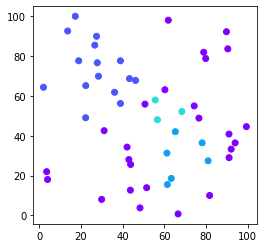

In [90]:
plt.figure(figsize=(4, 4))
plt.scatter(dataset[:, 0], dataset[:, 1], color=colors[clusters])
plt.show()